In [78]:
import os 
import sys
sys.path.append("/home/martin/Work/Qutip/modules")
import math
import Opt
import Tomomod as Tm
import Utility as Ut

In [130]:
# Extracting result from 2D and 3D 
Ps2D = Tm.Pstar()
Ps3D = 2.8832503479976155
B = 1.
Trot = 2.*math.pi * (6.*B)**(-1.)
cps = Tm.cosPhiS()
phis = -math.acos(cps)
print(180./math.pi*phis)
l0 = 0.
l3 = 1. - l0

-108.62895800065621


In [131]:
# Dictionaries for parameters and variables
var      = {'t2': 0.}
param    = {'P1': Ps3D/2., 'P2': Ps3D/2., 't1': 0., 'B': B}
method   = {'Method': 'DP_t2'}
target   = {'Target': 'S3'}
lagrange = {'l0': l0, 'l3': l3}

In [132]:
# Dimension of basis
dim = 3

In [133]:
n = 0
T1 = float(n) * math.pi / (3.*B) - phis / (6.*B)
T2 = float(n) * math.pi / (3.*B) + (0.5*math.pi - phis) / (6.*B)
#T2 = T1 + math.pi/(12.*B)

In [134]:
# Optimize S3
def optimize_proj(Op, dim, var, param, method, target, lagrange):
    
    optimizer = Opt.Optimizer(Op, dim, var, param, method, target, lagrange)
    optimizer.run_optimization()
    
    return optimizer

In [135]:
Op = 0.5 * (Tm.PauliN(0,dim) + Tm.PauliN(3,dim))
#Op = Tm.PauliN(3,dim)
OS3 = optimize_proj(Op, dim, var, param, method, target, lagrange)

S3 True
In run_optimization
In optimization
S3 DP_t2
1.0


In [136]:
print(OS3.opt)

      fun: 4.7141168466063566e-14
 hess_inv: array([[1]])
      jac: array([3.1752853e-07])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0.])


In [137]:
n = 1
var.update(t2 = float(n)*Trot)
var

{'t2': 1.0471975511965976}

In [138]:
OS3 = optimize_proj(Op, dim, var, param, method, target, lagrange)

S3 True
In run_optimization
In optimization
S3 DP_t2
1.0


In [139]:
print(OS3.opt)

      fun: 1.218902421668197e-14
 hess_inv: array([[0.10317943]])
      jac: array([-4.14420783e-07])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([1.01762068])


In [140]:
var.update(t2 = 1.)
var

{'t2': 1.0}

In [141]:
OS3 = optimize_proj(Op, dim, var, param, method, target, lagrange)

S3 True
In run_optimization
In optimization
S3 DP_t2
1.0


In [142]:
print(OS3.opt)

      fun: 2.0741002134730436e-16
 hess_inv: array([[0.08334733]])
      jac: array([1.88077432e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([1.18887769])


In [143]:
print(OS3.opt.fun)

2.0741002134730436e-16


In [144]:
# Plotting the results

def plot_proj_time(t, op, tc=None, opc=None):
    import matplotlib.pyplot as plt
    from IPython.display import Image
    %matplotlib inline

    fig, ax = plt.subplots()
    if (tc is None) or (opc is None):
        ax.plot(t, op)
    else:
        ax.plot(t, op, tc, opc, 'x')
    ax.set_xlabel('t (au)')
    ax.set_ylabel('Proj(PauliN)')
    plt.show()
    
def get_proj(Op, param, var, B, dim, which):
    Pulses = Ut.Pulses([param['P1'], param['P2']], [param['t1'], var['t2']])
    U = Ut.EvolutionOperators(Pulses, B, dim)
    Op_BW = Tm.UBWO(U.U, Op)
    Proj  = Tm.Proj(Op_BW, Tm.PauliN(which, dim))
    
    return Proj
    
def get_proj_vars(Op, P1, P2, t1, t2, dim, which):
    Pulses = Ut.Pulses([P1, P2], [t1, t2])
    U = Ut.EvolutionOperators(Pulses, B, dim)
    Op_BW = Tm.UBWO(U.U, Op)
    Proj  = Tm.Proj(Op_BW, Tm.PauliN(which, dim))
    
    return Proj

In [145]:
import numpy as np
t0 = 0. #1.18887769
dt = 0.01
nt = 1000
time = np.zeros(nt)
S3   = np.zeros(nt)
for i in range(nt):
    t = t0 + float(i) * dt
    time[i] = t #/ Trot
    var.update(t2 = t)
    OS3 = get_proj(Op, param, var, B, dim, 3)
    S3[i] = OS3

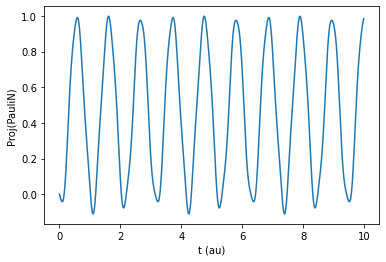

In [146]:
#print(time, S3)
plot_proj_time(time, S3)

In [147]:
t0 = 0.
dt = 6.*Trot /(2.*math.pi)
nt = 10
timeC = np.zeros(nt)
S3C   = np.zeros(nt)
for i in range(nt):
    t = t0 + float(i) * dt
    var.update(t2 = t)
    OS3_O = optimize_proj(Op, dim, var, param, method, target, lagrange)
    timeC[i] = OS3_O.opt.x[0] #/ Trot
    var.update(t2 = OS3_O.opt.x[0])
    S3_BW = get_proj(Op, param, var, B, dim, 3)
    S3C[i] = S3_BW


S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0


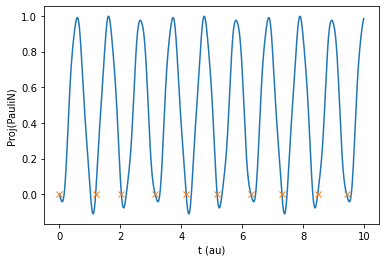

In [148]:
plot_proj_time(time, S3, timeC, S3C)

In [149]:
print(S3C)

[-2.17120171e-07 -1.44017367e-08 -1.66545332e-07 -6.72724033e-07
  1.34250986e-07 -1.08831862e-06  1.08571141e-06  3.01693149e-08
  2.10071049e-08  7.68642682e-08]


In [150]:
S0 = np.zeros(nt)
for i in range(nt):
    t = timeC[i]
    print(t)
    var.update(t2 = t)
    O_BW = get_proj(Op, param, var, B, dim, 0)
    S0[i] = O_BW

0.0
1.188877690193597
2.033808036125798
3.141593291918418
4.159213322214508
5.175401115674056
6.283183481845269
7.300806023008346
8.479297079818242
9.424777548880487


In [151]:
print(timeC)
print(S0)
print(S3C)

[0.         1.18887769 2.03380804 3.14159329 4.15921332 5.17540112
 6.28318348 7.30080602 8.47929708 9.42477755]
[0.92044852 0.96652399 0.9826716  0.92044847 0.95017947 0.98267159
 0.92044868 0.95017949 0.92616988 0.92044856]
[-2.17120171e-07 -1.44017367e-08 -1.66545332e-07 -6.72724033e-07
  1.34250986e-07 -1.08831862e-06  1.08571141e-06  3.01693149e-08
  2.10071049e-08  7.68642682e-08]


In [152]:
print(timeC[2]/Trot, S0[2], S3C[2])

1.942143613496645 0.9826716022101778 -1.6654533163684704e-07


Comparing with 4D

In [153]:
# The ground state measurment operator in N dimensions
def meas_gs(dim):
    return 0.5 * (Tm.PauliN(0, dim) + Tm.PauliN(3, dim))

In [154]:
t0 = 0. #1.18887769
dt = 0.01
nt = 1000
dim = 4
Op = meas_gs(dim)
time = np.zeros(nt)
S3   = np.zeros(nt)
for i in range(nt):
    t = t0 + float(i) * dt
    time[i] = t #/ Trot
    var.update(t2 = t)
    OS3 = get_proj(Op, param, var, B, dim, 3)
    S3[i] = OS3

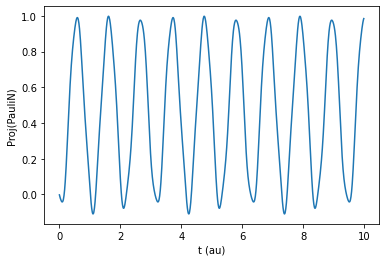

In [155]:
plot_proj_time(time, S3)

In [156]:
t0 = 0.
dt = Trot
nt = 10
#dim = 4
#Op = meas_gs(dim)
print(param)
timeC = np.zeros(nt)
S3C   = np.zeros(nt)
for i in range(nt):
    t = t0 + float(i) * dt
    var.update(t2 = t)
    OS3_O = optimize_proj(Op, dim, var, param, method, target, lagrange)
    timeC[i] = OS3_O.opt.x[0]# / Trot
    var.update(t2 = OS3_O.opt.x[0])
    S3_BW = get_proj(Op, param, var, B, dim, 3)
    S3C[i] = S3_BW

{'P1': 1.4416251739988077, 'P2': 1.4416251739988077, 't1': 0.0, 'B': 1.0}
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0
S3 True
In run_optimization
In optimization
S3 DP_t2
1.0


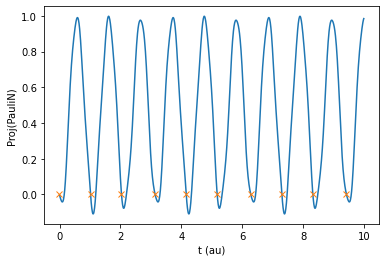

In [157]:
plot_proj_time(time, S3, timeC, S3C)

In [158]:
S0 = np.zeros(nt)
for i in range(nt):
    t = timeC[i]
    print(t)
    var.update(t2 = t)
    O_BW = get_proj(Op, param, var, B, dim, 0)
    S0[i] = O_BW

-0.0039023587095407355
1.017144528749354
2.0345504119508715
3.137690294879695
4.158737182339058
5.176143065542021
6.279282948469771
7.300329835929076
8.317735719130733
9.420875602059818


In [159]:
print(timeC)
print(S0)
print(S3C)

[-3.90235871e-03  1.01714453e+00  2.03455041e+00  3.13769029e+00
  4.15873718e+00  5.17614307e+00  6.27928295e+00  7.30032984e+00
  8.31773572e+00  9.42087560e+00]
[0.92302067 0.9507449  0.98145885 0.92302067 0.9507449  0.98145885
 0.92302067 0.9507449  0.98145885 0.92302067]
[-3.17824502e-08  1.27870839e-07 -1.98290331e-07 -3.17820315e-08
  1.27871037e-07 -1.98293255e-07 -3.17822445e-08  1.27870539e-07
 -1.98290924e-07 -3.17824349e-08]


In [160]:
print(timeC[2]/Trot, S0[2], S3C[2])

1.9428525301897992 0.9814588468337571 -1.9829033054419298e-07


Finding S1

In [161]:
var = {'t1': 0.}
param.update(t2 = timeC[2])
param
try:
    del param['t1']
except:
    KeyError
target.update(Target = 'S1')
method.update(Method = 'DP_t1')
try:
    del lagrange['l3']
except:
    KeyError
lagrange.update(l1 = 1. - l0)
        

In [162]:
lagrange

{'l0': 0.0, 'l1': 1.0}

In [163]:
param

{'P1': 1.4416251739988077,
 'P2': 1.4416251739988077,
 'B': 1.0,
 't2': 2.0345504119508715}

In [164]:
dim = 3
Op = meas_gs(dim)
OS1_O = optimize_proj(Op, dim, var, param, method, target, lagrange)


S1 True
In run_optimization
In optimization
S1 DP_t1


In [165]:
print(OS1_O.opt)

      fun: 0.0003012666127797825
 hess_inv: array([[0.80238532]])
      jac: array([-8.02689101e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 10
     njev: 12
   status: 0
  success: True
        x: array([0.36360587])


In [166]:
print(param['t2'] + OS1_O.opt.x[0])

2.398156283557528


In [167]:
Proj = get_proj_vars(Op, param['P1'], param['P2'], OS1_O.opt.x[0], param['t2'], dim, 1)

In [168]:
print(OS1_O.opt.x[0]/Trot, Proj)

0.34721803082061825 0.982642966475236


In [169]:
var.update(t1 = 1.)
target.update(Target = 'S2')
try:
    del lagrange['l1']
except:
    KeyError
lagrange.update(l2 = 1. - l0)
lagrange

{'l0': 0.0, 'l2': 1.0}

In [170]:
OS2_O = optimize_proj(Op, dim, var, param, method, target, lagrange)

S2 True
In run_optimization
In optimization
S2 DP_t1


In [171]:
Proj = get_proj_vars(Op, param['P1'], param['P2'], OS2_O.opt.x[0], param['t2'], dim, 2)

In [172]:
print(OS2_O.opt.x[0]/Trot, Proj, Proj**(-1.))

0.5972257201705886 0.9826429671924104 1.0176636208542578


In [173]:
mat = np.zeros((3,3))

In [174]:
mat[0,0] = 1.
mat[1,1] = 0.9826716014977619
mat[2,2] = 0.9826716021574672

In [175]:
print(mat)

[[1.        0.        0.       ]
 [0.        0.9826716 0.       ]
 [0.        0.        0.9826716]]


In [176]:
import numpy.linalg as lin

In [177]:
mat_inv = lin.inv(mat)

In [178]:
print(mat_inv)

[[1.         0.         0.        ]
 [0.         1.01763397 0.        ]
 [0.         0.         1.01763397]]
